## FASE 1: EXPLORACIÓN Y LIMPIEZA

### 1. Exploración inicial: 

- Realiza una exploración inicial de los datos para identificar posibles problemas, como valores nulos, atípicos o datos faltantes en las columnas relevantes.

- Utiliza funciones de Pandas para obtener información sobre la estructura de los datos, la presencia de valores nulos y estadisticas básicas de las columnas involucradas.

- Une los dos conjuntos de datos de la forma más eficiente.

### 2. Limpieza de datos:

- Elimina o trata los valores nulos, si los hay, en las columnas clave para asegurar que los datos estén completos.

- Verifica la consistencia y corrección de los datos para asegurarte de que los datos se presenten de forma coherente.

- Realiza cualquier ajuste o conversión necesaria en las columnas (por ejemplo, cambiar tipos de datos) para garantizar la adecuación de los datos para el análisis estadístico.

In [44]:
# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np

# Imputación de nulos usando métodos avanzados estadísticos
# -----------------------------------------------------------------------
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer

# Librerías de visualización
# -----------------------------------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt

# Configuración
# -----------------------------------------------------------------------
pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames

In [45]:
# Aplico una función para leer los datos del fichero:
def leer_datos(ruta, sep=","):

    df = pd.read_csv(ruta, sep=sep)
    return df

# Para hacer la llamada de la función
df_customer_flight=leer_datos('customer_flight_activity.csv', sep=";")
print(df_customer_flight)

       Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
0                        100018,2017,1,3,0,3,1521,152,0,0                                                                                                    
1                      100102,2017,1,10,4,14,2030,203,0,0                                                                                                    
2                        100140,2017,1,6,0,6,1200,120,0,0                                                                                                    
3                             100214,2017,1,0,0,0,0,0,0,0                                                                                                    
4                             100272,2017,1,0,0,0,0,0,0,0                                                                                                    
...                                                 

**Abriendo el fichero customer flight activity, me doy cuenta de que tiene todas las variables en una única columna.**

**Hay que separarlas, usando la coma cómo separador de columnas.**

In [46]:
#Voy a dividir la columna en 10 columnas, utilizando las comas para dividir las columnas
df_split_flight = df_customer_flight[
    'Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed'
    ].str.split(',', expand=True) 

# Voy a asignar los nombres a las columnas:
df_split_flight.columns = [
    'Loyalty Number', 'Year', 'Month', 'Flights Booked', 'Flights with Companions',
    'Total Flights', 'Distance', 'Points Accumulated', 'Points Redeemed',
    'Dollar Cost Points Redeemed'
]

# Con head visualizo las primeras 5 filas de mi nuevo dataframe
df_split_flight.head()

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
0,100018,2017,1,3,0,3,1521,152,0,0
1,100102,2017,1,10,4,14,2030,203,0,0
2,100140,2017,1,6,0,6,1200,120,0,0
3,100214,2017,1,0,0,0,0,0,0,0
4,100272,2017,1,0,0,0,0,0,0,0


In [47]:
def leer_datos(ruta, sep=","):

    df = pd.read_csv(ruta, sep=sep)
    return df

# Para hacer la llamada de la función
df_customer_loyalty=leer_datos('customer_loyalty_history.csv', sep=";")
print(df_customer_loyalty)

      Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
0      480934,Canada,Ontario,Toronto,M2Z 4K1,Female,B...                                                                                                                                            
1      549612,Canada,Alberta,Edmonton,T3G 6Y6,Male,Co...                                                                                                                                            
2      429460,Canada,British Columbia,Vancouver,V6E 3...                                                                                                                                            
3      608370,Canada,Ontario,Toronto,P1W 1K4,Male,Col...                                                                                                                                            
4      530508,C

**Abriendo el fichero customer loyalty history, veo que tenemos el mismo problema del otro fichero, voy a dividir las columnas con el mismo metodo.**

In [48]:
#Voy a dividir la columna en 16 columnas, utilizando las comas para dividir las columnas
df_split_loyalty = df_customer_loyalty['Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month'].str.split(',', expand=True) 

# Voy a asignar los nombres a las columnas:
df_split_loyalty.columns = [
   'Loyalty Number', 'Country', 'Province', 'City', 'Postal Code', 'Gender', 'Education', 'Salary', 'Marital Status', 'Loyalty Card', 'CLV' , 'Enrollment Type', 'Enrollment Year', 'Enrollment Month', 'Cancellation Year', 'Cancellation Month'
]

df_split_loyalty.head()

,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
0,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236,Married,Star,3839.14,Standard,2016,2,,
1,549612,Canada,Alberta,Edmonton,T3G 6Y6,Male,College,,Divorced,Star,3839.61,Standard,2016,3,,
2,429460,Canada,British Columbia,Vancouver,V6E 3D9,Male,College,,Single,Star,3839.75,Standard,2014,7,2018,1
3,608370,Canada,Ontario,Toronto,P1W 1K4,Male,College,,Single,Star,3839.75,Standard,2013,2,,
4,530508,Canada,Quebec,Hull,J8Y 3Z5,Male,Bachelor,103495,Married,Star,3842.79,Standard,2014,10,,


**Ahora que tengo los ficheros divididos en columnas, voy a analizarlos con una función para comprobar si hay valores nulos, duplicados, atípicos o datos faltantes.**

In [49]:
def explorar_dataset(df): # Función generica para una visión general del dataset

    print("Tamaño del dataset:")# Tamaño del dataset (filas y columnas)
    print(f"Filas: {df.shape[0]}, Columnas: {df.shape[1]}") # Tamaño del dataset (filas y columnas)
    print("\nTipos de datos:") # Tipos de datos por columna
    display(df.dtypes)
    print("\nValores_nulos:") 
    display(df.isnull().sum())
    print("Filas duplicadas en el dataset:")
    print(f"Filas: {df.duplicated().sum()}") #calcula la cantidad de filas duplicadas en el df

# Llamamos a la función para ver los datos de cadauno de los df
print(f'Dataframe actividad vuelos clientes:')
explorar_dataset(df_split_flight)
print('_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _', '\n')
print(f'Dataframe historial clientes:')
explorar_dataset(df_split_loyalty)


Dataframe actividad vuelos clientes:
Tamaño del dataset:
Filas: 405624, Columnas: 10

Tipos de datos:


Loyalty Number                 object
Year                           object
Month                          object
Flights Booked                 object
Flights with Companions        object
Total Flights                  object
Distance                       object
Points Accumulated             object
Points Redeemed                object
Dollar Cost Points Redeemed    object
dtype: object


Valores_nulos:


Loyalty Number                 0
Year                           0
Month                          0
Flights Booked                 0
Flights with Companions        0
Total Flights                  0
Distance                       0
Points Accumulated             0
Points Redeemed                0
Dollar Cost Points Redeemed    0
dtype: int64

Filas duplicadas en el dataset:
Filas: 1864
_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 

Dataframe historial clientes:
Tamaño del dataset:
Filas: 16737, Columnas: 16

Tipos de datos:


Loyalty Number        object
Country               object
Province              object
City                  object
Postal Code           object
Gender                object
Education             object
Salary                object
Marital Status        object
Loyalty Card          object
CLV                   object
Enrollment Type       object
Enrollment Year       object
Enrollment Month      object
Cancellation Year     object
Cancellation Month    object
dtype: object


Valores_nulos:


Loyalty Number        0
Country               0
Province              0
City                  0
Postal Code           0
Gender                0
Education             0
Salary                0
Marital Status        0
Loyalty Card          0
CLV                   0
Enrollment Type       0
Enrollment Year       0
Enrollment Month      0
Cancellation Year     0
Cancellation Month    0
dtype: int64

Filas duplicadas en el dataset:
Filas: 0


#### Hay algunos aspectos importantes a considerar:

#### Hay valores vacíos en algunas columnas ('Salary', 'Cancellation Year' y 'Cancellation Month'). 

#### Son valores faltantes que tengo que tratar en la fase de limpieza.
#### Para verificar duplicados de manera más efectiva, voy a enfocarme en el 'Loyalty Number', ya que es un identificador único para cada cliente. 

In [50]:
# Verificar duplicados en Loyalty Number
duplicados_loyalty = df_split_loyalty[df_split_loyalty.duplicated(subset=['Loyalty Number'], keep='first')]
print("Número de Loyalty Numbers duplicados:", len(duplicados_loyalty))

# Ver los números de lealtad que están duplicados (si hay alguno)
if len(duplicados_loyalty) > 0:
    print("\nLoyalty Numbers duplicados:")
    print(duplicados_loyalty['Loyalty Number'].values)

Número de Loyalty Numbers duplicados: 0


## VALORES ÚNICOS EN LOS DOS DF:

In [51]:
# Verificar el número de valores únicos en cada columna del df de actividad de vuelos
for columna in df_split_flight.columns:
    n_unicos = df_split_flight[columna].nunique()
    print(f"{columna}: {n_unicos} valores únicos")

Loyalty Number: 16737 valores únicos
Year: 2 valores únicos
Month: 12 valores únicos
Flights Booked: 22 valores únicos
Flights with Companions: 12 valores únicos
Total Flights: 33 valores únicos
Distance: 4746 valores únicos
Points Accumulated: 1549 valores únicos
Points Redeemed: 587 valores únicos
Dollar Cost Points Redeemed: 49 valores únicos


In [52]:
# Verificar el número de valores únicos en cada columna del df del historial clientes
for columna in df_split_loyalty.columns:
    n_unicos = df_split_loyalty[columna].nunique()
    print(f"{columna}: {n_unicos} valores únicos")

Loyalty Number: 16737 valores únicos
Country: 1 valores únicos
Province: 11 valores únicos
City: 29 valores únicos
Postal Code: 55 valores únicos
Gender: 2 valores únicos
Education: 5 valores únicos
Salary: 5891 valores únicos
Marital Status: 3 valores únicos
Loyalty Card: 3 valores únicos
CLV: 7984 valores únicos
Enrollment Type: 2 valores únicos
Enrollment Year: 7 valores únicos
Enrollment Month: 12 valores únicos
Cancellation Year: 7 valores únicos
Cancellation Month: 13 valores únicos


### Limpieza, pasos a seguir:

- Convertir 'Salary' y 'CLV' a tipo numérico
- Cambiar los nombres de los meses (o sea, sustituir los numeros con los nombres de los meses) para que los datos sean más legibles
- Tratar los valores vacíos en 'Salary'
- Decidir cómo manejar los registros sin fecha de cancelación (que probablemente son clientes activos)

#### Nota bene: todos los registros del df son de Canadá, pero no se puede considerar duplicado, simplemente es una caracteristica. Puedo decidir eliminar la columna si voy a trabajar solo con este df o dejarla por si voy a integrar otros df en un segundo momento (de otros paises).

In [53]:
# Creo un diccionario para mapear los números a nombres de meses
meses = {
    '1': 'January', '2': 'February', '3': 'March',
    '4': 'April', '5': 'May', '6': 'June',
    '7': 'July', '8': 'August', '9': 'September',
    '10': 'October', '11': 'November', '12': 'December'
}

# Aplico el mapeo a las columnas de meses
df_split_loyalty['Enrollment Month'] = df_split_loyalty['Enrollment Month'].map(meses)
df_split_loyalty['Cancellation Month'] = df_split_loyalty['Cancellation Month'].map(meses)
df_split_flight['Month'] = df_split_flight['Month'].map(meses)


# Verifico el cambio
print(df_split_loyalty[['Enrollment Month', 'Cancellation Month']].head())
print(df_split_flight[['Month']].head())

  Enrollment Month Cancellation Month
0         February                NaN
1            March                NaN
2             July            January
3         February                NaN
4          October                NaN
     Month
0  January
1  January
2  January
3  January
4  January


In [54]:
# En Cancellation Month, decido reemplazar los nulos con 'Active Member':

df_split_loyalty['Cancellation Month'] = df_split_loyalty['Cancellation Month'].fillna('Active Member')

# Hago lo mismo con el año, para mantener la consistencia de los datos:

df_split_loyalty['Cancellation Year'] = df_split_loyalty['Cancellation Year'].fillna('Active')


In [55]:
# Verificar el tipo de dato de Cancellation Year
print("Tipo de dato de Cancellation Year:", df_split_loyalty['Cancellation Year'].dtype)

# Hacer el cambio asegurándonos de manejar los valores vacíos
df_split_loyalty['Cancellation Year'] = df_split_loyalty['Cancellation Year'].replace('', 'Active')
# O alternativamente:
# df_split_loyalty['Cancellation Year'] = df_split_loyalty['Cancellation Year'].fillna('Active')

# Verificar el cambio
print("\nPrimeras filas después del cambio:")
print(df_split_loyalty[['Cancellation Year', 'Cancellation Month']].head(10))

Tipo de dato de Cancellation Year: object

Primeras filas después del cambio:
  Cancellation Year Cancellation Month
0            Active      Active Member
1            Active      Active Member
2              2018            January
3            Active      Active Member
4            Active      Active Member
5            Active      Active Member
6            Active      Active Member
7            Active      Active Member
8            Active      Active Member
9            Active      Active Member


In [56]:
df_split_loyalty.head()

,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
0,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236,Married,Star,3839.14,Standard,2016,February,Active,Active Member
1,549612,Canada,Alberta,Edmonton,T3G 6Y6,Male,College,,Divorced,Star,3839.61,Standard,2016,March,Active,Active Member
2,429460,Canada,British Columbia,Vancouver,V6E 3D9,Male,College,,Single,Star,3839.75,Standard,2014,July,2018,January
3,608370,Canada,Ontario,Toronto,P1W 1K4,Male,College,,Single,Star,3839.75,Standard,2013,February,Active,Active Member
4,530508,Canada,Quebec,Hull,J8Y 3Z5,Male,Bachelor,103495,Married,Star,3842.79,Standard,2014,October,Active,Active Member


In [57]:
# Voy a transformar el tipo de datos da categoricos a numericos en las columnas Salary y  y de paso , 
# si faltan registros los reemplazo con NaN:


import pandas as pd

def cambiar_tipo_datos(df):
    # Diccionario que mapea las columnas a su tipo deseado
    tipos_datos = {'Salary': 'float64', 'CLV': 'float64'}

    for columna, tipo in tipos_datos.items():
        # Reemplazar los valores vacíos con NaN y luego convertir a tipo numérico
        df[columna] = pd.to_numeric(df[columna], errors='coerce')
    
    return df

# Usar la función en tu DataFrame
df_split_loyalty = cambiar_tipo_datos(df_split_loyalty)

# Verificar los tipos de datos después del cambio
print(df_split_loyalty.dtypes)




Loyalty Number         object
Country                object
Province               object
City                   object
Postal Code            object
Gender                 object
Education              object
Salary                float64
Marital Status         object
Loyalty Card           object
CLV                   float64
Enrollment Type        object
Enrollment Year        object
Enrollment Month       object
Cancellation Year      object
Cancellation Month     object
dtype: object


**Observando el df de actividad de vuelos, puedo ver que hay que cambiar algunos tipos de datos, porque son todos object, o sea categoricos (eso seguramente pasó en el momento de separación de las columnas) y algunos necesito que sean numericos para poder calcular porcentajes y estadisticas, como por ejemplo: Flights Booked, Flights with Companions, Total Flights, Distance, Points Accumulated, Points Redeemed, Dollar Cost Points Redeemed.**

**También veo que hay 1864 filas duplicadas, pero he comprobado y veo que se trata de años, meses, numeros de puntos acumulados y redimidos, el valor en dolares de los puntos, etc. Creo que no hace falta modificar esos datos**


In [58]:
# Voy a transformar el tipo de datos da categoricos a numerico en las columnas que he identificado antes:

def cambiar_tipo_datos(df):
    # Diccionario que mapea las columnas a su tipo deseado
    tipos_datos = {
        'Flights Booked': 'float64', 
        'Flights with Companions': 'float64', 
        'Total Flights': 'float64', 
        'Distance': 'float64', 
        'Points Accumulated': 'float64', 
        'Points Redeemed': 'float64', 
        'Dollar Cost Points Redeemed': 'float64'
    }
    
    # Aplicar la conversión de tipos de datos
    df = df.astype(tipos_datos)

    return df

# Usar la función en tu DataFrame
df_split_flight = cambiar_tipo_datos(df_split_flight)

# Verificar los tipos de datos después del cambio
print(df_split_flight.dtypes)


Loyalty Number                  object
Year                            object
Month                           object
Flights Booked                 float64
Flights with Companions        float64
Total Flights                  float64
Distance                       float64
Points Accumulated             float64
Points Redeemed                float64
Dollar Cost Points Redeemed    float64
dtype: object


In [59]:
# Ahora quiero estandarizar los nombres de todas las columnas de los dos df:
# cambiar todas las etiquetas a minusculas y sustituir los espacios con guion bajo:

df_split_flight.columns = [col.lower().replace(" ", "_") 
for col in df_split_flight.columns] #df actividad vuelos
print(f'Primeras 5 filas df Actividad vuelos:')
print(df_split_flight.head()) 

print('_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _', '\n')

df_split_loyalty.columns = [col.lower().replace(" ", "_") 
for col in df_split_loyalty.columns] #df historial clientes
print(f'Primeras 5 filas df Historial clientes:')
print(df_split_flight.head()) 

Primeras 5 filas df Actividad vuelos:
  loyalty_number  year    month  flights_booked  flights_with_companions  \
0         100018  2017  January             3.0                      0.0   
1         100102  2017  January            10.0                      4.0   
2         100140  2017  January             6.0                      0.0   
3         100214  2017  January             0.0                      0.0   
4         100272  2017  January             0.0                      0.0   

   total_flights  distance  points_accumulated  points_redeemed  \
0            3.0    1521.0               152.0              0.0   
1           14.0    2030.0               203.0              0.0   
2            6.0    1200.0               120.0              0.0   
3            0.0       0.0                 0.0              0.0   
4            0.0       0.0                 0.0              0.0   

   dollar_cost_points_redeemed  
0                          0.0  
1                          0.0  
2  

In [60]:
# Voy a transformar otra vez el tipo de datos da float a int en algunas de las columnas que he transformado antes:

def cambiar_tipo_datos(df):
    # Diccionario que mapea las columnas a su tipo deseado
    tipos_datos = {
        'flights_booked': 'int64', 
        'flights_with_companions': 'int64', 
        'total_flights': 'int64', 
        'points_accumulated': 'int64', 
        'points_redeemed': 'int64', 
    }
    
    # Aplicar la conversión de tipos de datos
    df = df.astype(tipos_datos)

    return df

# Usar la función en tu DataFrame
df_split_flight = cambiar_tipo_datos(df_split_flight)

# Verificar los tipos de datos después del cambio
print(df_split_flight.dtypes)


loyalty_number                  object
year                            object
month                           object
flights_booked                   int64
flights_with_companions          int64
total_flights                    int64
distance                       float64
points_accumulated               int64
points_redeemed                  int64
dollar_cost_points_redeemed    float64
dtype: object


In [61]:
df_split_flight.head(10)

,loyalty_number,year,month,flights_booked,flights_with_companions,total_flights,distance,points_accumulated,points_redeemed,dollar_cost_points_redeemed
0,100018,2017,January,3,0,3,1521.0,152,0,0.0
1,100102,2017,January,10,4,14,2030.0,203,0,0.0
2,100140,2017,January,6,0,6,1200.0,120,0,0.0
3,100214,2017,January,0,0,0,0.0,0,0,0.0
4,100272,2017,January,0,0,0,0.0,0,0,0.0
5,100301,2017,January,0,0,0,0.0,0,0,0.0
6,100364,2017,January,0,0,0,0.0,0,0,0.0
7,100380,2017,January,0,0,0,0.0,0,0,0.0
8,100428,2017,January,6,0,6,606.0,60,0,0.0
9,100504,2017,January,0,0,0,0.0,0,0,0.0


In [62]:
df_split_loyalty.head(10)

,loyalty_number,country,province,city,postal_code,gender,education,salary,marital_status,loyalty_card,clv,enrollment_type,enrollment_year,enrollment_month,cancellation_year,cancellation_month
0,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,February,Active,Active Member
1,549612,Canada,Alberta,Edmonton,T3G 6Y6,Male,College,NaN,Divorced,Star,3839.61,Standard,2016,March,Active,Active Member
2,429460,Canada,British Columbia,Vancouver,V6E 3D9,Male,College,NaN,Single,Star,3839.75,Standard,2014,July,2018,January
3,608370,Canada,Ontario,Toronto,P1W 1K4,Male,College,NaN,Single,Star,3839.75,Standard,2013,February,Active,Active Member
4,530508,Canada,Quebec,Hull,J8Y 3Z5,Male,Bachelor,103495.0,Married,Star,3842.79,Standard,2014,October,Active,Active Member
5,193662,Canada,Yukon,Whitehorse,Y2K 6R0,Male,Bachelor,51124.0,Married,Star,3844.57,Standard,2012,May,Active,Active Member
6,927943,Canada,Ontario,Toronto,P5S 6R4,Female,College,NaN,Single,Star,3857.95,Standard,2014,June,Active,Active Member
7,188893,Canada,Ontario,Trenton,K8V 4B2,Male,Bachelor,100159.0,Married,Star,3861.49,Standard,2016,December,Active,Active Member
8,852392,Canada,Quebec,Montreal,H2Y 2W2,Female,Bachelor,100159.0,Married,Star,3861.49,Standard,2015,May,Active,Active Member
9,866307,Canada,Ontario,Toronto,M8Y 4K8,Male,Bachelor,100159.0,Married,Star,3861.49,Standard,2016,October,Active,Active Member


## UNION DE LOS DOS DATAFRAME:

In [63]:
df_combined_left = pd.merge(df_split_flight, df_split_loyalty, on='loyalty_number', how='left')

# MERGE: combina df utilizando columnas comunes, y pone una tabla al lado de otra.
# LEFT: Este tipo de unión mantendría todas las filas de df_customer_loyalty y solo agregarías las columnas 
# de df_split_loyalty cuando haya una coincidencia en 'Loyalty Number'.

print(df_combined_left.head())

  loyalty_number  year    month  flights_booked  flights_with_companions  \
0         100018  2017  January               3                        0   
1         100102  2017  January              10                        4   
2         100140  2017  January               6                        0   
3         100214  2017  January               0                        0   
4         100272  2017  January               0                        0   

   total_flights  distance  points_accumulated  points_redeemed  \
0              3    1521.0                 152                0   
1             14    2030.0                 203                0   
2              6    1200.0                 120                0   
3              0       0.0                   0                0   
4              0       0.0                   0                0   

   dollar_cost_points_redeemed country          province          city  \
0                          0.0  Canada           Alberta      Edmo

In [64]:
df_combined_outer = pd.merge(df_split_flight, df_split_loyalty, on='loyalty_number', how='outer') 

# MERGE: combina df utilizando columnas comunes, y pone una tabla al lado de otra.
# OUTER: Este tipo de unión mantiene todas las filas de ambos DataFrames y pone NaN donde no haya coincidencia en 'Loyalty Number'.

print(df_combined_outer.head())

  loyalty_number  year     month  flights_booked  flights_with_companions  \
0         100018  2017   January               3                        0   
1         100018  2017  February               2                        2   
2         100018  2018   October               6                        4   
3         100018  2017     April               4                        0   
4         100018  2017       May               0                        0   

   total_flights  distance  points_accumulated  points_redeemed  \
0              3    1521.0                 152                0   
1              4    1320.0                 132                0   
2             10    3110.0                 311              385   
3              4     924.0                  92                0   
4              0       0.0                   0                0   

   dollar_cost_points_redeemed country province      city postal_code  gender  \
0                          0.0  Canada  Alberta  Edmo

In [71]:
# Estadísticas básicas generales
print("Estadísticas básicas de variables numéricas:")
print(df_combined_outer.describe())

# Verificar valores nulos en cada columna
print("\nValores nulos por columna:")
print(df_combined_outer.isnull().sum())

# Información general del dataframe
print("\nInformación general del dataframe:")
print(df_combined_outer.info())

# Para variables categóricas, ver las frecuencias
print("\nDistribución por Province:")
print(df_combined_outer['province'].value_counts())

print("\nDistribución vuelos por Mes:")
print(df_combined_outer['flights_booked'].value_counts())

print("\nDistribución por Education:")
print(df_combined_outer['education'].value_counts())

print("\nDistribución por Loyalty Card:")
print(df_combined_outer['loyalty_card'].value_counts())

print("\nDistribución por Género:")
print(df_combined_outer['gender'].value_counts())

# Estadísticas específicas para columnas numéricas clave
print("\nEstadísticas de vuelos y puntos:")
print("Promedio de vuelos reservados:", df_combined_outer['flights_booked'].mean())
print("Máximo de vuelos reservados:", df_combined_outer['flights_booked'].max())
print("Promedio de puntos acumulados:", df_combined_outer['points_accumulated'].mean())
print("Promedio de distancia volada:", df_combined_outer['distance'].mean())

Estadísticas básicas de variables numéricas:
       flights_booked  flights_with_companions  total_flights       distance  \
count   405624.000000            405624.000000  405624.000000  405624.000000   
mean         4.115052                 1.031805       5.146858    1208.880059   
std          5.225518                 2.076869       6.521227    1433.155320   
min          0.000000                 0.000000       0.000000       0.000000   
25%          0.000000                 0.000000       0.000000       0.000000   
50%          1.000000                 0.000000       1.000000     488.000000   
75%          8.000000                 1.000000      10.000000    2336.000000   
max         21.000000                11.000000      32.000000    6293.000000   

       points_accumulated  points_redeemed  dollar_cost_points_redeemed  \
count       405624.000000    405624.000000                405624.000000   
mean           123.667002        30.696872                     2.484503   
std      

## **ALGUNOS PUNTOS IMPORTANTES A DESTACAR EN LOS RESULTADOS:**

### **Distribución geográfica:**

- Ontario es la provincia con más clientes (130,896)
- Seguida por British Columbia (106,848) y Quebec (79,968)
- Las provincias más pequeñas como Prince Edward Island tienen menor representación (1,584)

### **Distribución por mes:**

- Desglose de los resultados:

  - 0: 197,992: Esto significa que 197,992 clientes no reservaron vuelos en ese mes específico. Este podría ser el número de clientes que no tuvieron actividad de vuelos reservados en ese mes.

  - 3: 18,228: Aquí, 18,228 clientes reservaron exactamente 3 vuelos en el mes.

  - 11: 15,705: 15,705 clientes reservaron 11 vuelos en el mes.

Y así sucesivamente. Los números en la primera columna (0, 3, 11, 5, etc.) representan la cantidad de vuelos reservados en ese mes, y los números en la segunda columna (como 197,992, 18,228, etc.) indican cuántos clientes realizaron esa cantidad de vuelos reservados.

#### CONCLUSIÓN, MUCHOS CLIENTES NO HAN RESERVADO VUELOS ESE MES, hay que saber si es porque no están activos o si es en un mes especifico, lo veremos en el próximo paso.


### **Nivel educativo:**

- La mayoría son graduados universitarios (Bachelor: 253,752)
- Seguido por College (102,672)
- Menor proporción de doctores (17,856) y másters (12,336)

### **Tarjetas de fidelidad:**

- Star es la más común (184,224 usuarios)
- Seguida por Nova (137,568)
- Aurora es la menos común (83,832)

### **Comportamiento de vuelos:**

- Media de 4.11 vuelos por cliente
- La mayoría viaja solo (media de 1.03 vuelos con acompañantes)
- Distancia media volada: 1,208.88 unidades
- Un 25% de los registros tienen 0 en distancia y vuelos

### **Distribución por género:**

- Hay casi el mismo numero de hombres y mujeres, pero las mujeres son un pelín más

### **Programa de puntos:**

- Media de 123.67 puntos acumulados
- Baja tasa de redención (media de 30.70 puntos redimidos)
- Muchos clientes no han redimido puntos (mediana = 0)



## PROBLEMAS A SOLUCIONAR:

#### Salary:

- Hay un valor mínimo negativo (-58,486) que claramente es un error, ya que un salario no puede ser negativo
- Hay 102,672 valores nulos (missing values) en la columna salary
- El rango de salarios (de los valores válidos) parece razonable, con una media de 79,268 y valores máximos de 407,228

In [72]:
# Convertir salarios negativos a positivos usando valor absoluto
df_combined_outer['salary'] = df_combined_outer['salary'].abs()

# Verificar el cambio
print("Verificación después del cambio:")
print(df_combined_outer['salary'].describe())

Verificación después del cambio:
count    302952.000000
mean      79381.440228
std       34735.904533
min        9081.000000
25%       59262.000000
50%       73479.000000
75%       88612.000000
max      407228.000000
Name: salary, dtype: float64


### ¿QUÉ HACER CON LOS NULOS EN SALARY?

### Se me ocurre imputar esos nulos con la mediana o un valor medio, pero en ese caso estaría alterando los datos y el porcentaje de nulos es aproximadamente del 25%. Prefiero ser más transparente y basar mi analisis en los datos reales.

## FASE 2: VISUALIZACIÓN 

### Usando las herramientas de visualización que has aprendido durante el módulo, contesta a las siguientes preguntas usando la mejor gráfica que consideres:

***1. ¿Cómo se distribuye la cantidad de vuelos reservados por mes durante el año?***

***2. ¿Existe una relación entre la distancia de los vuelos y los puntos acumulados por los clientes?***

***3. ¿Cuál es la distribución de los clientes por provincia o estado?***

***4. ¿Cómo se compara el salario promedio entre los diferentes niveles educativos de los clientes?***

***5. ¿Cuál es la proporción de clientes con diferentes tipos de tarjetas de fidelidad?***

***6. ¿Cómo se distribuyen los clientes según su estado civil y género?***

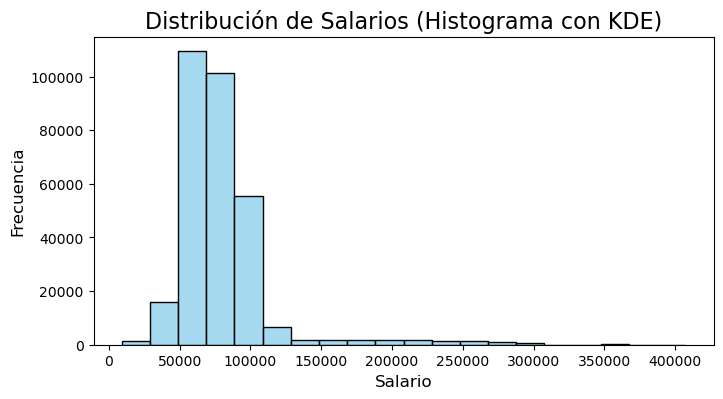

In [73]:
# Voy a hacer un histograma para ver mejor esos datos de salary:

# Crear el histograma con KDE y personalizar los colores
plt.figure(figsize=(8, 4))

# Histograma con color 'skyblue' para las barras y curva KDE con color 'red'
sns.histplot(df_combined_outer['salary'], bins=20, kde=False, color='skyblue', edgecolor='black')

# Añadir título y etiquetas
plt.title('Distribución de Salarios (Histograma con KDE)', fontsize=16)
plt.xlabel('Salario', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)

# Mostrar el gráfico
plt.show()



In [68]:
# Como esperabamos, se notan muchos outlier en el gráfico y en la pregunta 4 se nos pide 
# como se compara el salario promedio entre los diferentes niveles educativos.

# En esa pregunta creo que aplicaré una trasformación de los outliers

#### PREGUNTA 1:
- ***1. ¿Cómo se distribuye la cantidad de vuelos reservados por mes durante el año?***

/var/folders/mf/fv1_014j6_d_r5n12hjxrz9r0000gn/T/ipykernel_995/993362196.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=monthly_flights, x='month', y='flights_booked', palette='viridis')


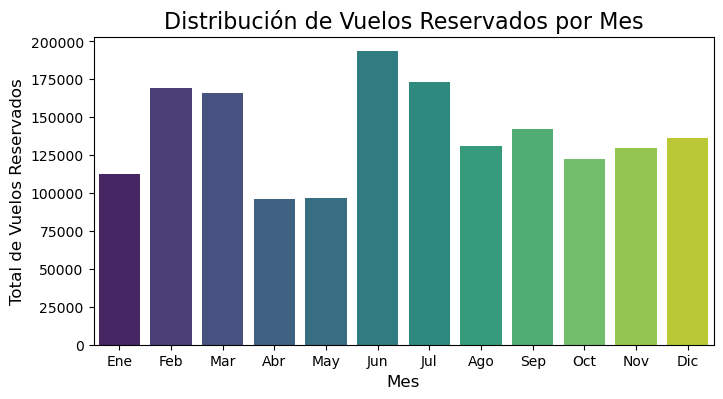

In [76]:
# Agrupar por año y mes para obtener el total de vuelos reservados por mes
monthly_flights = df_combined_outer.groupby(['month'], as_index=False)['flights_booked'].sum()

# Crear gráfico de barras
plt.figure(figsize=(8, 4))
sns.barplot(data=monthly_flights, x='month', y='flights_booked', palette='viridis')

# Personalizar gráficos
plt.title('Distribución de Vuelos Reservados por Mes', fontsize=16)
plt.xlabel('Mes', fontsize=12)
plt.ylabel('Total de Vuelos Reservados', fontsize=12)
plt.xticks(ticks=range(0, 12), labels=['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic'])

# Mostrar gráfico
plt.show()


#### En este gráfico de barras podemos ver que los picos de reservas de vuelos por mes a lo largo del año son entre febrero y marzo y entre junio y julio. Se puede explicar con el hecho de que en muchos países, febrero y marzo coinciden con las vacaciones de invierno o con las vacaciones de primavera o "Spring Break" en América del Norte (EE.UU. y Canadá), especialmente entre los estudiantes universitarios y los colegios. Además está el turismo de invierno y los días festivos, que en febrero en Canada son varios (Día de la familia, día de los Presidentes) y en marzo es semana santa (esta fiesta pero es más de America latina, pero puede que haya muchos latinos americanos que viven en Canada).

#### El periodo de Junio-Julio coincide con las vacaciones escolares en Canadá, eso lo convierte en un periodo en el que las familias pueden concederse viajes largos.

In [84]:


# Definir los intervalos de distancia (distance) y puntos acumulados (points)
# Usamos intervalos más equilibrados en ambos casos, pero también adecuados para las escalas de los datos

distance_bins = [0, 100, 500, 2000, 5000, 10000, 20000, 50000]  # Distancias más ajustadas y progresivas
points_bins = [0, 50, 200, 500, 1000, 2000, 5000, 10000]  # Puntos más equilibrados

# Crear columnas de categorías para los intervalos (bins)
df_combined_outer['distance_category'] = pd.cut(df_combined_outer['distance'], bins=distance_bins)
df_combined_outer['points_category'] = pd.cut(df_combined_outer['points_accumulated'], bins=points_bins)

# Crear la tabla de contingencia (cross-tabulation)
contingency_table = pd.crosstab(df_combined_outer['distance_category'], df_combined_outer['points_category'])

# Mostrar la tabla de contingencia
print(contingency_table)


points_category    (0, 50]  (50, 200]  (200, 500]  (500, 1000]
distance_category                                             
(0, 100]                22          0           0            0
(100, 500]            4808        339           0            0
(500, 2000]            146      77198        2907            0
(2000, 5000]             0        390      118296          638
(5000, 10000]            0          0          36         2852


In [90]:


# Agrupar por tipo de tarjeta de lealtad (loyalty_card) y calcular el total y promedio de 'distance' y 'points_accumulated'
agg_df = df_combined_outer.groupby('loyalty_card').agg(
    total_distance=('distance', 'sum'),   # Total de distancia por tipo de tarjeta
    avg_distance=('distance', 'mean'),    # Promedio de distancia por tipo de tarjeta
    total_points=('points_accumulated', 'sum'),  # Total de puntos acumulados por tipo de tarjeta
    avg_points=('points_accumulated', 'mean')    # Promedio de puntos acumulados por tipo de tarjeta
).reset_index()

# Mostrar los resultados
print(agg_df)


  loyalty_card  total_distance  avg_distance  total_points  avg_points
0       Aurora     101290803.0   1208.259412      10672536  127.308617
1         Nova     165416668.0   1202.435654      16967972  123.342434
2         Star     223643294.0   1213.974802      22521796  122.252236


/var/folders/mf/fv1_014j6_d_r5n12hjxrz9r0000gn/T/ipykernel_995/1719053268.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='loyalty_card', y='total_distance', data=agg_df, palette='Purples')


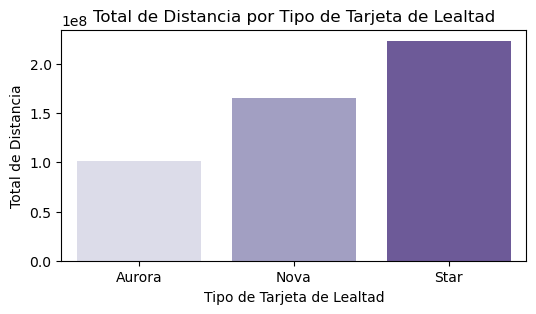

/var/folders/mf/fv1_014j6_d_r5n12hjxrz9r0000gn/T/ipykernel_995/1719053268.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='loyalty_card', y='avg_points', data=agg_df, palette='Purples')


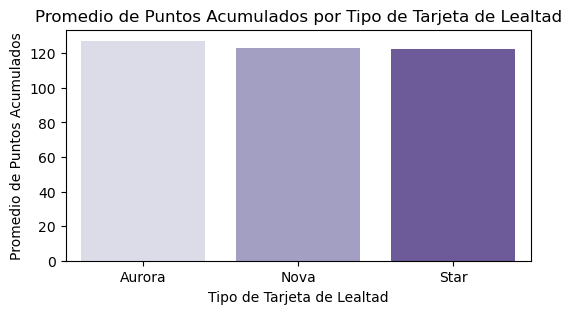

In [99]:
# Visualizamos estos datos para entenderlos mejor: 

# Gráfico de barras para total de distancia por tipo de tarjeta
plt.figure(figsize=(6, 3))
sns.barplot(x='loyalty_card', y='total_distance', data=agg_df, palette='Purples')

plt.title('Total de Distancia por Tipo de Tarjeta de Lealtad', fontsize=12)
plt.xlabel('Tipo de Tarjeta de Lealtad', fontsize=10)
plt.ylabel('Total de Distancia', fontsize=10)
plt.show()

# Gráfico de barras para promedio de puntos acumulados por tipo de tarjeta
plt.figure(figsize=(6, 3))
sns.barplot(x='loyalty_card', y='avg_points', data=agg_df, palette='Purples')

plt.title('Promedio de Puntos Acumulados por Tipo de Tarjeta de Lealtad', fontsize=12)
plt.xlabel('Tipo de Tarjeta de Lealtad', fontsize=10)
plt.ylabel('Promedio de Puntos Acumulados', fontsize=10)
plt.show()
